In [96]:
import sys
sys.path.append("..")
import os
from utils.load_data import load_parquet, load_index, load_csv
from utils.evaultation.generator import Generator
from algo.LSHAlgo import LSH
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import ndcg_score, dcg_score
import math

In [97]:
from utils.evaultation.score.metrics import get_mean_reciprocal_rank, get_mean_precision_k, get_mean_ndcg_k, get_mean_latency, get_median_latency, get_batch_latency
from utils.get_data_path import get_lsh_path, get_data_path


In [98]:
nbits_config = [2,4,8,16,32,64,128,256,512,768]

In [40]:
### Ground truth file path
gt_path = get_data_path("eval/gt/starbucks_AlgoType.VSM__type=gt.parquet")
gt_path

'c:\\Users\\user\\OneDrive\\Documents\\GitHub\\sc4020-project-1\\sc4020-project-1\\data\\eval\\gt\\starbucks_AlgoType.VSM__type=gt.parquet'

In [41]:
ground_truth_path = os.path.abspath('../data/eval/gt/starbucks_AlgoType.VSM__type=gt.parquet')
ground_truth = load_parquet(ground_truth_path)
print(f"Number of queries: {ground_truth.shape[0]}")
print(f"Top K: {len(ground_truth['top_k'][0].tolist())}")
ground_truth.head()

Number of queries: 32
Top K: 31


,question,embedded_question,top_k,time_taken
0,I came back to Oklahoma City due to a business...,"[0.024681065, 0.01832836, 0.01097147, 0.052377...",[I came back to Oklahoma City due to a busines...,13
1,Ok I know how the staff at Starbucks at 23811 ...,"[0.017611356, -6.50298e-05, 0.0130937155, 0.02...",[Ok I know how the staff at Starbucks at 23811...,4
2,No Review Text,"[-0.038292427, -0.03849039, -0.00024594436, 0....","[No Review Text, No Review Text, No Review Tex...",3
3,"Food and drinks are excellent, and priced that...","[-0.010892307, 0.02383849, -0.012035828, 0.040...","[Food and drinks are excellent, and priced tha...",3
4,My family went into the Kernersville main Star...,"[0.0057428936, 0.018904189, -0.01149764, 0.038...",[My family went into the Kernersville main Sta...,3


In [42]:
### Parent file var
parent_file = "starbucks_lsh_indiv_all_combi"

In [89]:
### Creating all combinations of construct and m

df_mp = pd.DataFrame({
    'nbits_config': [],
    "mp_1": [],
    "mp_3": [],
    "mp_5": [],
    "mp_10": [],
    "mrr_1": [],
    "mrr_3": [],
    "mrr_5": [],
    "mrr_10": [],
    "ndcg_1": [],
    "ndcg_3": [],
    "ndcg_5": [],
    "ndcg_10": [],
    "latency": []
})

for n in nbits_config:
    path = get_lsh_path("starbucks", parent_file, n, algo_type="AlgoType.LSH") 
    df_mp.loc[len(df_mp)] = [
        n,
        get_mean_precision_k(gt_path, [path], 1, 10, review_header="Review")[0],
        get_mean_precision_k(gt_path, [path], 3, 10, review_header="Review")[0],
        get_mean_precision_k(gt_path, [path], 5, 10, review_header="Review")[0],
        get_mean_precision_k(gt_path, [path], 10, 10, review_header="Review")[0],
        get_mean_reciprocal_rank(gt_path, [path], 1, review_header="Review")[0],
        get_mean_reciprocal_rank(gt_path, [path], 3, review_header="Review")[0],
        get_mean_reciprocal_rank(gt_path, [path], 5, review_header="Review")[0],
        get_mean_reciprocal_rank(gt_path, [path], 10, review_header="Review")[0],
        get_mean_ndcg_k(gt_path, [path], 1, review_header="Review")[0],
        get_mean_ndcg_k(gt_path, [path], 3, review_header="Review")[0],
        get_mean_ndcg_k(gt_path, [path], 5, review_header="Review")[0],
        get_mean_ndcg_k(gt_path, [path], 10, review_header="Review")[0],
        get_mean_latency([path])[0]
    ]

In [90]:
df_mp.head()

,nbits_config,mp_1,mp_3,mp_5,mp_10,mrr_1,mrr_3,mrr_5,mrr_10,ndcg_1,ndcg_3,ndcg_5,ndcg_10,latency
0,2.0,0.00000,0.000000,0.00000,0.003125,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.001645,839628.125
1,4.0,0.09375,0.031250,0.01875,0.012500,0.09375,0.09375,0.09375,0.097222,0.09375,0.041953,0.026910,0.017354,768531.250
2,8.0,0.09375,0.041667,0.02500,0.015625,0.09375,0.09375,0.09375,0.093750,0.09375,0.041953,0.028830,0.020794,250200.000
3,16.0,0.12500,0.052083,0.04375,0.028125,0.12500,0.12500,0.12500,0.125000,0.12500,0.061641,0.045164,0.033185,633675.000
4,32.0,0.12500,0.072917,0.06250,0.071875,0.09375,0.09375,0.10000,0.112798,0.09375,0.061641,0.060829,0.071711,789028.125


### Mean Precision@K

Mean Precision@3, Mean Precision@5, Mean Precision@10

In [83]:
df_mp.head(10)

,nbits_config,mp_1,mp_3,mp_5,mp_10,mrr_1,mrr_3,mrr_5,mrr_10,ndcg_1,ndcg_3,ndcg_5,ndcg_10,latency
0,2.0,0.00000,0.000000,0.00000,0.003125,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.001645,0.840
1,4.0,0.09375,0.031250,0.01875,0.012500,0.09375,0.093750,0.093750,0.097222,0.09375,0.041953,0.026910,0.017354,0.769
2,8.0,0.09375,0.041667,0.02500,0.015625,0.09375,0.093750,0.093750,0.093750,0.09375,0.041953,0.028830,0.020794,0.250
3,16.0,0.12500,0.052083,0.04375,0.028125,0.12500,0.125000,0.125000,0.125000,0.12500,0.061641,0.045164,0.033185,0.634
4,32.0,0.12500,0.072917,0.06250,0.071875,0.09375,0.093750,0.100000,0.112798,0.09375,0.061641,0.060829,0.071711,0.789
5,64.0,0.18750,0.125000,0.11250,0.087500,0.09375,0.104167,0.111979,0.115885,0.09375,0.071485,0.075997,0.090325,0.345
6,128.0,0.34375,0.239583,0.18750,0.175000,0.12500,0.140625,0.140625,0.151128,0.12500,0.121015,0.127756,0.187780,0.485
7,256.0,0.46875,0.343750,0.31875,0.287500,0.09375,0.182292,0.196354,0.220002,0.09375,0.190937,0.235562,0.300685,0.727
8,512.0,0.71875,0.593750,0.53750,0.387500,0.40625,0.510417,0.526042,0.543651,0.40625,0.430078,0.436519,0.459829,0.609
9,768.0,0.90625,0.729167,0.63125,0.509375,0.40625,0.468750,0.504687,0.528026,0.40625,0.410079,0.488332,0.581716,0.521


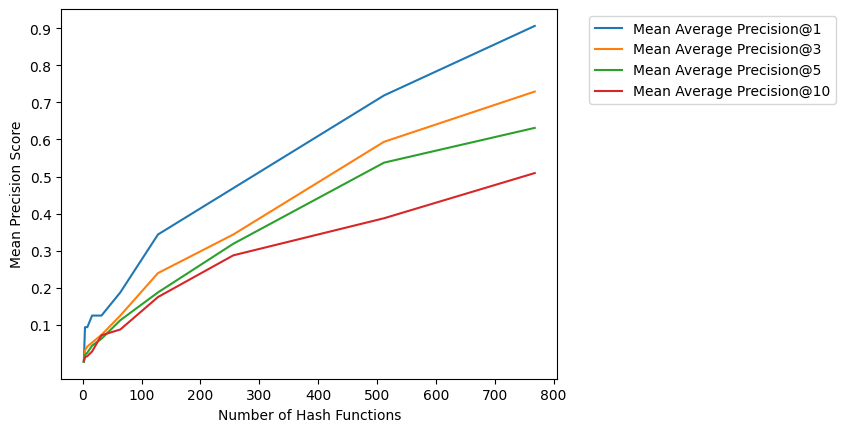

In [73]:
plt.plot(df_mp['nbits_config'], df_mp['mp_1'], label="Mean Average Precision@1")
plt.plot(df_mp['nbits_config'], df_mp['mp_3'], label="Mean Average Precision@3")
plt.plot(df_mp['nbits_config'], df_mp['mp_5'], label="Mean Average Precision@5")
plt.plot(df_mp['nbits_config'], df_mp['mp_10'], label="Mean Average Precision@10")

plt.xlabel("Number of Hash Functions")
plt.ylabel("Mean Precision Score")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.yticks(np.arange(0.1, 1, 0.1))
plt.show()

### Mean Reciprocal Rank@K

In [85]:
df_mp[['nbits_config', 'mrr_1', 'mrr_3', 'mrr_5', 'mrr_10']].head(10)

,nbits_config,mrr_1,mrr_3,mrr_5,mrr_10
0,2.0,0.00000,0.000000,0.000000,0.000000
1,4.0,0.09375,0.093750,0.093750,0.097222
2,8.0,0.09375,0.093750,0.093750,0.093750
3,16.0,0.12500,0.125000,0.125000,0.125000
4,32.0,0.09375,0.093750,0.100000,0.112798
5,64.0,0.09375,0.104167,0.111979,0.115885
6,128.0,0.12500,0.140625,0.140625,0.151128
7,256.0,0.09375,0.182292,0.196354,0.220002
8,512.0,0.40625,0.510417,0.526042,0.543651
9,768.0,0.40625,0.468750,0.504687,0.528026


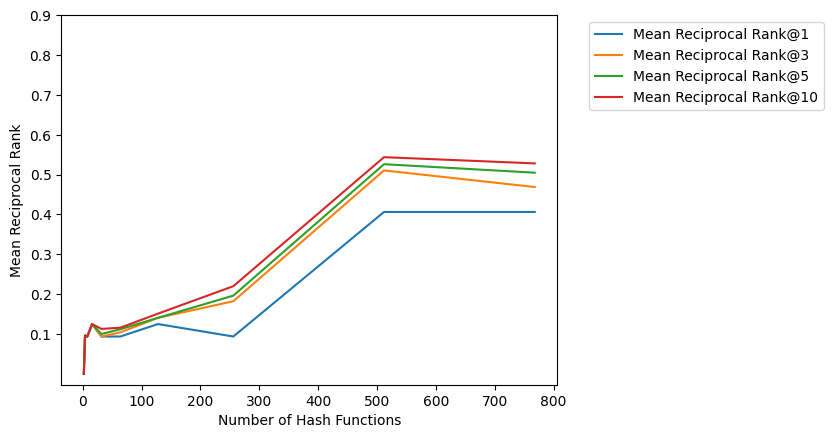

In [74]:
plt.plot(df_mp['nbits_config'], df_mp['mrr_1'], label="Mean Reciprocal Rank@1")
plt.plot(df_mp['nbits_config'], df_mp['mrr_3'], label="Mean Reciprocal Rank@3")
plt.plot(df_mp['nbits_config'], df_mp['mrr_5'], label="Mean Reciprocal Rank@5")
plt.plot(df_mp['nbits_config'], df_mp['mrr_10'], label="Mean Reciprocal Rank@10")

plt.xlabel("Number of Hash Functions")
plt.ylabel("Mean Reciprocal Rank")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.yticks(np.arange(0.1, 1, 0.1))
plt.show()

### Mean Normalised Discounted Cumulative Gain@K

In [86]:
df_mp[['nbits_config', 'ndcg_1', 'ndcg_3', 'ndcg_5', 'ndcg_10']].head(10)

,nbits_config,ndcg_1,ndcg_3,ndcg_5,ndcg_10
0,2.0,0.00000,0.000000,0.000000,0.001645
1,4.0,0.09375,0.041953,0.026910,0.017354
2,8.0,0.09375,0.041953,0.028830,0.020794
3,16.0,0.12500,0.061641,0.045164,0.033185
4,32.0,0.09375,0.061641,0.060829,0.071711
5,64.0,0.09375,0.071485,0.075997,0.090325
6,128.0,0.12500,0.121015,0.127756,0.187780
7,256.0,0.09375,0.190937,0.235562,0.300685
8,512.0,0.40625,0.430078,0.436519,0.459829
9,768.0,0.40625,0.410079,0.488332,0.581716


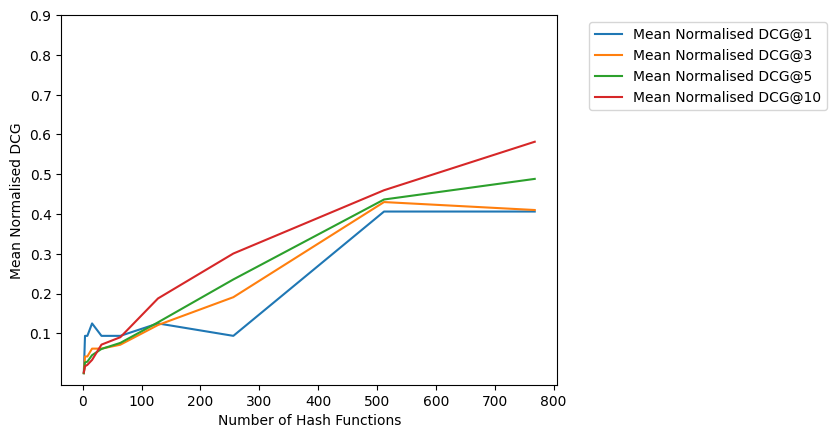

In [75]:
plt.plot(df_mp['nbits_config'], df_mp['ndcg_1'], label="Mean Normalised DCG@1")
plt.plot(df_mp['nbits_config'], df_mp['ndcg_3'], label="Mean Normalised DCG@3")
plt.plot(df_mp['nbits_config'], df_mp['ndcg_5'], label="Mean Normalised DCG@5")
plt.plot(df_mp['nbits_config'], df_mp['ndcg_10'], label="Mean Normalised DCG@10")

plt.xlabel("Number of Hash Functions")
plt.ylabel("Mean Normalised DCG")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.yticks(np.arange(0.1, 1, 0.1))
plt.show()

## Latency

In [91]:
df_mp['latency'].max()

839628.125

In [92]:
df_mp['latency'].min()

250200.0

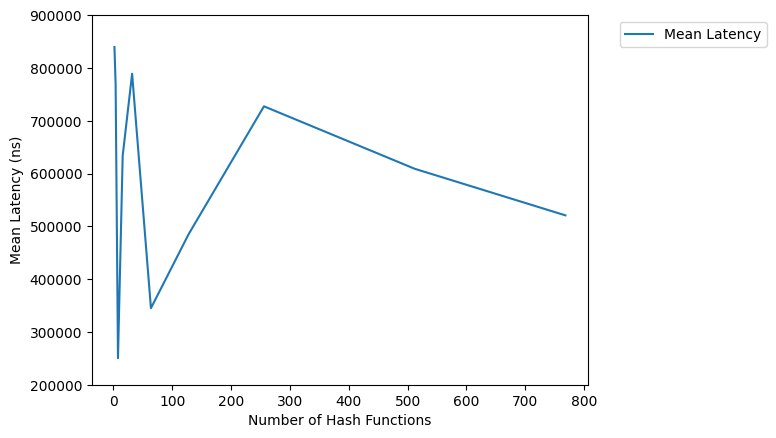

In [93]:
plt.plot(df_mp['nbits_config'], df_mp['latency'], label="Mean Latency")

plt.xlabel("Number of Hash Functions")
plt.ylabel("Mean Latency (ns)")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(200000,900000)
plt.show()

In [94]:
df_mp['latency'] = df_mp['latency'].apply(lambda x: round(x / 1_000_000, 3))

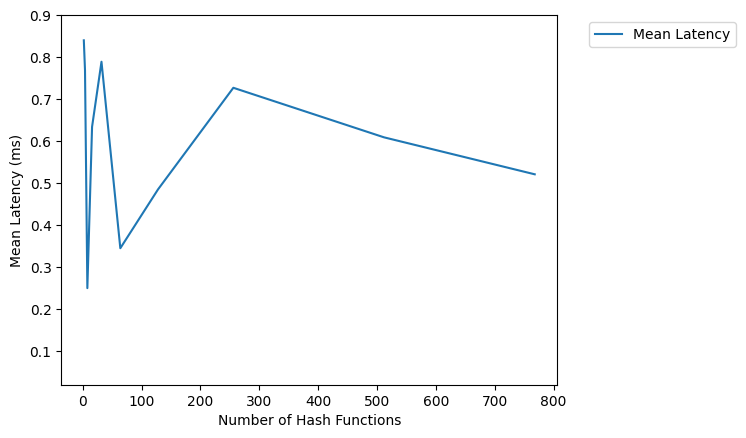

In [95]:
plt.plot(df_mp['nbits_config'], df_mp['latency'], label="Mean Latency")

plt.xlabel("Number of Hash Functions")
plt.ylabel("Mean Latency (ms)")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(0.02,0.9)
plt.show()

## Memory Usage

In [112]:
import os
base_file = "../data/starbucks/indexing/lsh"
sizes = []
for n in nbits_config:
    file = f"{base_file}{n}.index"
    print(f"{os.path.getsize(file)}")
    sizes.append(os.path.getsize(file)/1_000_000)

9135
17327
33711
67329
134565
269037
537981
1075869
2151645
3227421


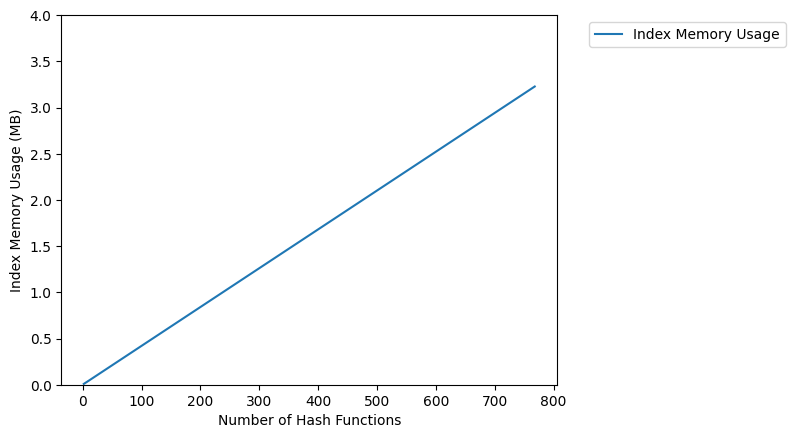

In [113]:
plt.plot(df_mp['nbits_config'], sizes, label="Index Memory Usage")

plt.xlabel("Number of Hash Functions")
plt.ylabel("Index Memory Usage (MB)")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(0, 4)
plt.show()